<b>In this practical exam you are required to do the following:</b><b>
1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Update your implementation to work for mini-batch.
</b>

### Please fulfil the following requirements:
<br>
<b>
    
    1. Each implementation must be in a sepearate function. i.e. two separate functions.
    2. Check each function on the data in the attached file.
    3. You must obtain r2-score > 0.9 using each functiion.
    4. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    5. Choose hyper parameters to obtain the required accuracy.
    6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
    7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>
    
<b><i>Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b>

## Best of Luck...

In [1]:
#  Enstablishing enivornment 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
import time 

In [2]:
#Read dataset from CSV file 
Data=pd.read_csv("MultipleLR.csv",header=None)
Features=Data.loc[:, '0':'2']
Y=Data[[3]]
Features=np.array(Features)
Y=np.array(Y)
ones=np.ones(shape=Y.shape)
Features=np.hstack([ones,Features])
Features

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [3]:
X_train,X_test,Y_train,Y_test =train_test_split (Features,Y,test_size=0.25,random_state=1)
#Normalize training and testing Dataset 
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(X_train)
scaled_training_data=scalar.transform(X_train)
scaled_test_data=scalar.transform(X_test)
#fixed Target train and test shape to fit our model 
Y_train =Y_train.reshape(-1,1)
Y_test  =Y_test.reshape(-1,1)
print(X_train.shape)
print(X_test.shape)

(18, 4)
(7, 4)


We will implement Adam for mini batch GD and passing the batch size= length of the data 

### Adam  batch GD 

In [4]:
# implementing shuffling Data function 
#input (Features & target)
#output(shuffling Features with corresponding shuffling target)
def suffle (Features,Y):
    Data=np.hstack([Features,Y])
    np.random.shuffle(Data)
    Features=Data[:,0:Data.shape[1]-1]
    Y=Data[:,-1].reshape(-1,1)
    return Features,Y

In [5]:
def MV_Batch_ADAM (Data,Target,alpha,Beta1,Beta2,Epsilon,ThrShG,ThrShC):
    Earr=[]
    Carr=[]
    Earr=[]
    Carr=[]
    count=0
    THarr=[]
    TH=np.zeros(shape=(Data.shape[1],1)) 
    M=np.zeros(shape=(Data.shape[1],1))
    V=np.zeros(shape=(Data.shape[1],1))
    GDVN=100
    #MSError=1000
    #Earr.append(MSError)
    while(GDVN>=ThrShG):
            THarr.append(TH)
            count+=1
            Carr.append(count)
            YD=Data@TH
            Error=YD-Target
            MSError=((np.linalg.norm(Error))**2)*(1/(2*(len(Target))))
            Earr.append(MSError)
            GDV=(1/(len(Target)))*(Data.T)@Error
            GDVN=np.linalg.norm(GDV)
            M=(Beta1*M)+(1-Beta1)*GDV
            V=(Beta2*V)+(1-Beta2)*(GDV)**2    
            TH=TH-(alpha/(np.sqrt(V)+Epsilon))*M

            Data,Target=suffle (Data,Target)
            if (len(Earr)>=2):
            
                 if(abs(Earr[-1]-Earr[-2])<=ThrShC):
                    
                    break
         
    return TH,Carr,Earr,count,THarr

In [6]:
#Batch Size= len(Data)=18 
start=time.time()
TH,Carr,Earr,count,THarr=MV_Batch_ADAM (X_train,Y_train,0.001,0.9,0.999,1e-8,0.001,0.01)
end=time.time()
print(f"time taken ={end-start} seconds")

time taken =0.04192352294921875 seconds


In [7]:
TH

array([[0.66942945],
       [0.66902802],
       [0.66879347],
       [0.67127441]])

In [8]:
Earr

[13098.63888888889,
 12976.077159529726,
 12812.302131536619,
 12622.888037808641,
 12416.390218096556,
 12198.41018303094,
 11972.91854815197,
 11742.853940942101,
 11510.446982643587,
 11277.416530575263,
 11045.098148325618,
 10814.53304358649,
 10586.532245221451,
 10361.724392796172,
 10140.592197078653,
 9923.500789805934,
 9710.720099714947,
 9502.442725523044,
 9298.798349003977,
 9099.865447258617,
 8905.680868782158,
 8716.247701192104,
 8531.541760105154,
 8351.516956420539,
 8176.109745276558,
 8005.242818947655,
 7838.828174377686,
 7676.769661432284,
 7518.965098554425,
 7365.308027070099,
 7215.689163000781,
 7069.997595218676,
 6928.121770622299,
 6789.950300327294,
 6655.372615364781,
 6524.279495827089,
 6396.563493618401,
 6272.119265813732,
 6150.8438329905985,
 6032.6367746830165,
 5917.400372244222,
 5805.039707832886,
 5695.462726909716,
 5588.58027050694,
 5484.306082579876,
 5382.556796940317,
 5283.251907583305,
 5186.313725633314,
 5091.6673256373015,
 4999.2

Text(0, 0.5, 'error')

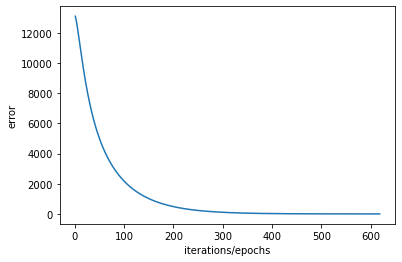

In [9]:
plt.plot(Carr,Earr)
plt.xlabel("iterations/epochs")
plt.ylabel("error")

In [10]:
TH

array([[0.66942945],
       [0.66902802],
       [0.66879347],
       [0.67127441]])

In [11]:
THarr

[array([[0.],
        [0.],
        [0.],
        [0.]]),
 array([[0.00316228],
        [0.00316228],
        [0.00316228],
        [0.00316228]]),
 array([[0.00741134],
        [0.00741134],
        [0.00741134],
        [0.00741134]]),
 array([[0.01235962],
        [0.01235962],
        [0.01235962],
        [0.01235962]]),
 array([[0.0177967 ],
        [0.0177967 ],
        [0.0177967 ],
        [0.01779671]]),
 array([[0.02358543],
        [0.02358543],
        [0.02358542],
        [0.02358544]]),
 array([[0.02962835],
        [0.02962835],
        [0.02962834],
        [0.02962838]]),
 array([[0.0358528 ],
        [0.03585279],
        [0.03585278],
        [0.03585284]]),
 array([[0.04220287],
        [0.04220285],
        [0.04220285],
        [0.04220294]]),
 array([[0.04863471],
        [0.04863469],
        [0.04863468],
        [0.04863482]]),
 array([[0.05511344],
        [0.0551134 ],
        [0.05511338],
        [0.05511358]]),
 array([[0.06161102],
        [0.06161098]

In [12]:
def Theta (THarr,n):
    Theta=[]
    for i in THarr:
        Theta.append(i[n])
    return   Theta  

In [13]:
Theta0=Theta (THarr,0)
Theta1=Theta (THarr,1)
Theta2=Theta (THarr,2)
Theta3=Theta (THarr,3)

Text(0, 0.5, 'error')

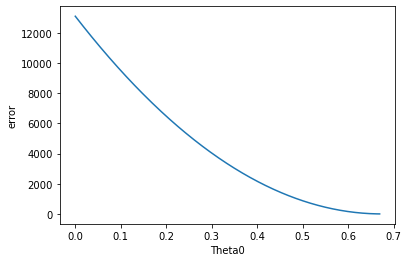

In [14]:
plt.plot(Theta0,Earr)
plt.xlabel("Theta0")
plt.ylabel("error")

Text(0, 0.5, 'error')

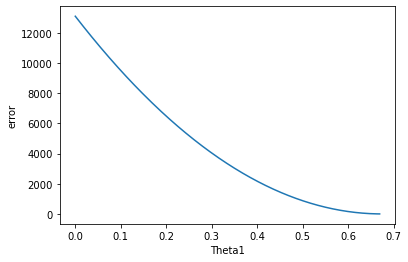

In [15]:
plt.plot(Theta1,Earr)
plt.xlabel("Theta1")
plt.ylabel("error")

Text(0, 0.5, 'error')

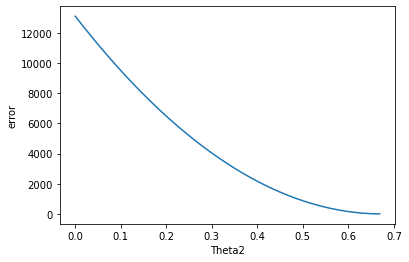

In [16]:
plt.plot(Theta2,Earr)
plt.xlabel("Theta2")
plt.ylabel("error")

Text(0, 0.5, 'error')

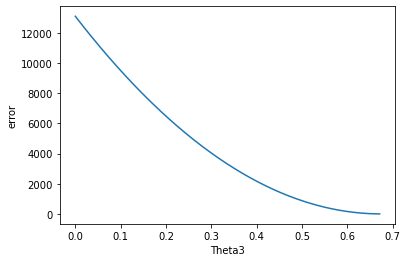

In [17]:
plt.plot(Theta3,Earr)
plt.xlabel("Theta3")
plt.ylabel("error")

In [18]:
Tn=X_train@TH

In [19]:
r2_score(Y_train,Tn)

0.9772291214635276

In [20]:
Tnt=X_test@TH

In [21]:
r2_score(Y_test,Tnt)

0.9760198570843429

### Adam mini batch GD 

In [22]:
def MV_mini_Batch_ADAM_With_Suffle (Data,Target,alpha,BatchSize,Beta1,Beta2,Epsilon,ThrShG,ThrShC):
    Earr=[]
    Carr=[]
    Earr=[]
    Carr=[]
    count=0
    THarr=[]
    
    TH=np.zeros(shape=(Data.shape[1],1)) 
    M=np.zeros(shape=(Data.shape[1],1))
    V=np.zeros(shape=(Data.shape[1],1))
    GDVN=100
    #MSError=1000
    #Earr.append(MSError)
    while(GDVN>=ThrShG):
        G=0
        if (int(len(Target)%BatchSize)==0):
            R=int(len(Target)/BatchSize)
        else:
            R=int(len(Target)/BatchSize)+1
            
        #print(R)
        for i in range(0,R):
            #print("before if "+str(i))
            
            if (G+BatchSize>len(Target)):
                #print("after if "+str(i))
                #TH0arr.extend(TH[0])
                #TH1arr.extend(TH[1])
                THarr.append(TH)
                count+=1
                Carr.append(count)
                YD=Data[G:len(Target)]@TH
                Error=YD-Target[G:len(Target)]
                MSError=np.sum((Error)**2)/(2*len(YD))
                Earr.append(MSError)
                GDV=(Data[G:len(Target)].T)@Error/len(YD)
                GDVN=np.linalg.norm(GDV)
                M=(Beta1*M)+(1-Beta1)*GDV
                #print(i)
                #b=1-(Beta1**(i+1))
                #print(M)
                #M=M/(1-(Beta1**(i+1)))
                #print(b)
                #print(M)
                V=(Beta2*V)+(1-Beta2)*(GDV)**2 
                #print(V)
                #V=V/(1-(Beta2**(i+1))) 
                #print(V)
                TH=TH-(alpha/(np.sqrt(V)+Epsilon))*M

            else:
                #print("after if and condition is true"+str(i))
                count+=1
                THarr.append(TH)
                Carr.append(count)
                YD=Data[G:(G+BatchSize)+1]@TH
                #print(YD.shape)
                #print(Target[G:G+BatchSize].shape)
                Error=YD-Target[G:(G+BatchSize)+1]
                MSError=(np.sum(Error**2))/(2*(BatchSize))
                Earr.append(MSError)
                #print(MSError)
                GDV=((Data[G:(G+BatchSize)+1].T)@Error)/(BatchSize)
                GDVN=np.linalg.norm(GDV)
                M=(Beta1*M)+(1-Beta1)*GDV
                #print(M)
                #b=1-(Beta1**(i+1))
                #M=M/(1-(Beta1**(i+1)))
                #print(b)
                #print(M)
                V=(Beta2*V)+(1-Beta2)*(GDV)**2 
                #print(V)
                #V=V/(1-(Beta2**(i+1))) 
                #print(V)
                TH=TH-(alpha/(np.sqrt(V)+Epsilon))*M

            G=G+BatchSize
            Data,Target=suffle (Data,Target)
        if (len(Earr)>=2):
             if(abs((Earr[-1]-Earr[-2]))<=ThrShC):
                
                 break
         
    return TH,Carr,Earr,count,THarr

In [50]:
start=time.time()
TH,Carr,Earr,count,THarr=MV_mini_Batch_ADAM_With_Suffle (X_train,Y_train,0.01,3,0.9,0.999,1e-8,0.001,0.001)
end=time.time()
print(f"time taken {end-start} secods")

time taken 0.7021629810333252 secods


Text(0, 0.5, 'error')

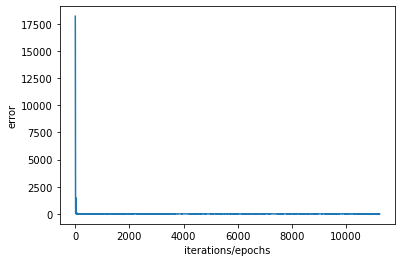

In [51]:
plt.plot(Carr,Earr)
plt.xlabel("iterations/epochs")
plt.ylabel("error")

In [52]:
Theta0m=Theta (THarr,0)
Theta1m=Theta (THarr,1)
Theta2m=Theta (THarr,2)
Theta3m=Theta (THarr,3)

Text(0, 0.5, 'error')

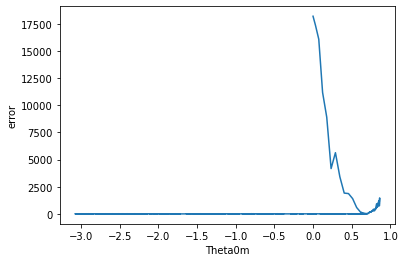

In [53]:
plt.plot(Theta0m,Earr)
plt.xlabel("Theta0m")
plt.ylabel("error")

Text(0, 0.5, 'error')

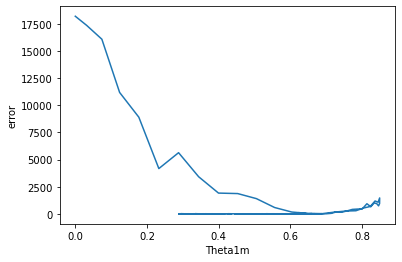

In [54]:
plt.plot(Theta1m,Earr)
plt.xlabel("Theta1m")
plt.ylabel("error")

Text(0, 0.5, 'error')

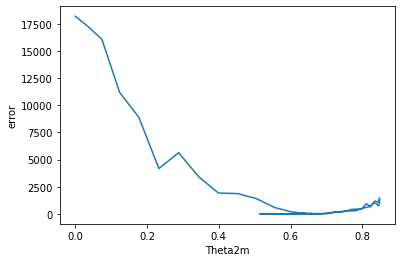

In [55]:
plt.plot(Theta2m,Earr)
plt.xlabel("Theta2m")
plt.ylabel("error")

Text(0, 0.5, 'error')

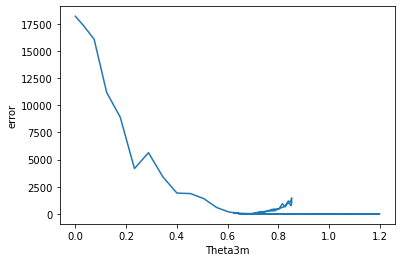

In [56]:
plt.plot(Theta3m,Earr)
plt.xlabel("Theta3m")
plt.ylabel("error")

In [57]:
Tnm=X_train@TH

In [58]:
r2_score(Y_train,Tnm)

0.9878086348147358

In [59]:
Tntm=X_test@TH

In [60]:
r2_score(Y_test,Tntm)

0.990500320205925

In [48]:
model=LinearRegression()
start=time.time()
model.fit(X_train,Y_train)
end=time.time()
print(f"time taken {end-start} seconds")

time taken 0.0009968280792236328 seconds


In [49]:
ys_test=model.predict(X_test)
r2_score(Y_test,ys_test)

0.9818045971793428